- **Import Required Libraries**:  
  - Use `pandas` for data handling, `numpy` for numerical operations, and `sklearn` for machine learning tasks.  

- **Set Random Seed**:  
  - Define a fixed random seed (`random = 15`) for reproducibility.  

- **Load Training and Testing Data**:  
  - Read **train** and **test** datasets from CSV files using `pandas`.  

- **Separate Features and Target Variable**:  
  - Extract **features (X)** and **target labels (y)** from both training and testing datasets.  
  - Assume the **last column** of each dataset is the target variable.  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random = 15

# Load train and test data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target variable for training and testing
X_train = train_data.iloc[:, :-1]  # All columns except the last
y_train = train_data.iloc[:, -1]   # Last column as target

X_test = test_data.iloc[:, :-1]         # All columns except the last
y_test = test_data.iloc[:, -1]          # Last column as target

----
- **Define parameters** for a Random Forest model:
  - `n_estimators`: Number of trees in the forest (100).
  - `max_features`: Number of random features to consider for splitting (square root of the number of features).
  - `bootstrap`: Enables bootstrap sampling.

- **Train two Random Forest classifiers**:
  - One using the **Gini impurity** criterion.
  - One using the **Entropy** criterion.
  - Both models are trained on `X_train` and `y_train`.

- **Make predictions**:
  - Predict on both training (`X_train`) and testing (`X_test`) datasets for both models.

- **Compute errors**:
  - Calculate training and testing errors for both models using `accuracy_score`.

- **Compute average tree depth**:
  - Calculate the average depth of trees in both forests.

- **Output results**:
  - Print training error, testing error, and average tree depth for both Gini and Entropy-based Random Forests.

In [ ]:
# Define parameters for the Random Forest
n_estimators = 100  # Number of trees in the forest
max_features = int(np.sqrt(X_train.shape[1]))  # Number of random features (sqrt(d))
bootstrap = True  # Use bootstrap sampling

# Initialize dictionaries to store results
results = {
    "gini": {"model": None, "train_error": None, "test_error": None, "avg_depth": None},
    "entropy": {"model": None, "train_error": None, "test_error": None, "avg_depth": None}
}

# Loop over Gini and Entropy criteria
for criterion in ["gini", "entropy"]:
    # Train Random Forest with the current criterion
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=random
    )
    rf.fit(X_train, y_train)
    
    # Store the trained model
    results[criterion]["model"] = rf
    
    # Make predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Store errors
    results[criterion]["train_error"] = train_error
    results[criterion]["test_error"] = test_error
    
    # Compute average tree depth
    tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
    avg_depth = np.mean(tree_depths)
    
    # Store average depth
    results[criterion]["avg_depth"] = avg_depth

# Output results
for criterion, metrics in results.items():
    print(f"Random Forest with {criterion.capitalize()}:")
    print(f"Training Error: {metrics['train_error']:.4f}")
    print(f"Testing Error: {metrics['test_error']:.4f}")
    print(f"Average Tree Depth: {metrics['avg_depth']:.2f}\n")

Random Forest with Gini:
Training Error: 0.0008
Testing Error: 0.0587
Average Tree Depth: 33.84

Random Forest with Entropy:
Training Error: 0.0008
Testing Error: 0.0554
Average Tree Depth: 30.98



----
- **Import `matplotlib.pyplot`** for plotting.

- **Define a range of `max_depths`** (from 20 to 49) to test for a Random Forest model.

- **Initialize lists** to store training and test errors for each `max_depth`.

- **Loop over each `max_depth` value**:
  - Train a Random Forest model with the current `max_depth`.
  - Make predictions on the training (`X_train`) and test (`X_test`) datasets.
  - Compute training and test errors using `accuracy_score`.
  - Store the errors in `train_errors` and `test_errors` lists.

- **Plot the training and test errors**:
  - Create a line plot showing how errors change with increasing `max_depth`.
  - Include labels, a legend, and a grid for better visualization.

- **Identify the optimal `max_depth`**:
  - Find the `max_depth` value that results in the lowest test error.
  - Print the optimal `max_depth` and the corresponding lowest test error.

- **Output results**:
  - Display the plot of errors vs. `max_depth`.
  - Print the optimal `max_depth` and the lowest test error achieved.

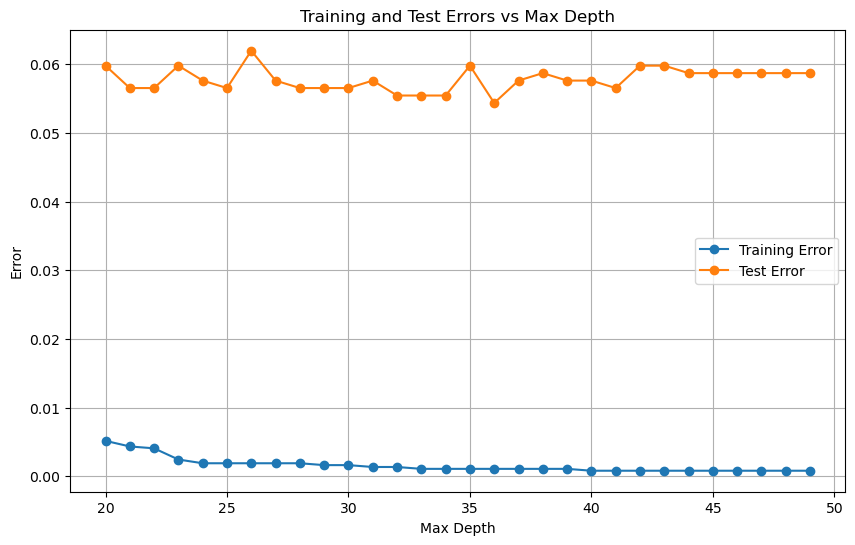

Optimal Max Depth: 36
Lowest Test Error: 0.0543


In [ ]:
import matplotlib.pyplot as plt

# Range of max depths to test
max_depths = range(20, 50)  # Test max depths from 1 to 20
train_errors = []
test_errors = []

# Loop over max_depth values
for depth in max_depths:
    # Train a Random Forest with the current max depth
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        bootstrap=bootstrap,
        max_depth=depth,  # Set the current max depth
        random_state=random
    )
    rf.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Store errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label="Training Error", marker='o')
plt.plot(max_depths, test_errors, label="Test Error", marker='o')

# Plot details
plt.title("Training and Test Errors vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# Identify the minimum test error and corresponding max depth
min_test_error = min(test_errors)
optimal_max_depth = max_depths[np.argmin(test_errors)]

print(f"Optimal Max Depth: {optimal_max_depth}")
print(f"Lowest Test Error: {min_test_error:.4f}")

----
- **Define a range of values for `n_trees`** (number of trees in the Random Forest):
  - Test values from 10 to 300 in steps of 10.

- **Initialize lists** to store training and test errors for each number of trees.

- **Loop through each value of `n_trees`**:
  - Train a Random Forest model with the current number of trees.
  - Use `max_features` as the square root of the number of features and enables bootstrap sampling.
  - Make predictions on the training (`X_train`) and test (`X_test`) datasets.
  - Compute training and test errors using `accuracy_score`.
  - Store the errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing how training and test errors change with the number of trees.
  - Include labels, a legend, and a grid for better visualization.

- **Identify the optimal number of trees**:
  - Find the number of trees that results in the lowest test error.
  - Print the optimal number of trees and the corresponding minimum test error.

- **Output results**:
  - Display the plot of errors vs. number of trees.
  - Print the optimal number of trees and the minimum test error achieved.

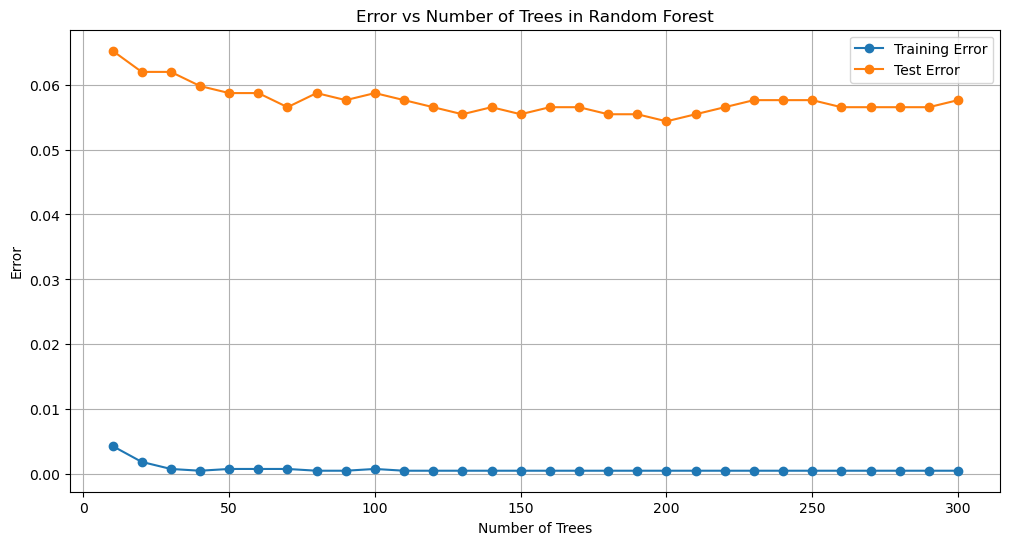

Optimal number of trees: 200
Minimum test error: 0.0543


In [ ]:
# Range of values for the number of trees in the forest
n_trees_range = range(10, 310, 10)  # Number of trees from 10 to 300 in steps of 10

# Lists to store errors
train_errors = []
test_errors = []

# Loop through each value for the number of trees
for n_trees in n_trees_range:
    # Create and train the random forest
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        max_features=int(np.sqrt(X_train.shape[1])),
        bootstrap=True,
        random_state=random
    )
    rf.fit(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(n_trees_range, train_errors, label="Training Error", marker='o')
plt.plot(n_trees_range, test_errors, label="Test Error", marker='o')

# Add plot details
plt.title("Error vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of trees with the minimum test error
optimal_n_trees = n_trees_range[np.argmin(test_errors)]
print(f"Optimal number of trees: {optimal_n_trees}")
print(f"Minimum test error: {min(test_errors):.4f}")


----
- **Calculate the base value for `max_features`**:
  - Use the square root of the number of features (`sqrt(d)`) as the base value.

- **Define a range of `max_features` values**:
  - Generate 7 evenly spaced values centered around the base value.
  - Spread the values by 50% of the base value on either side.

- **Initialize lists** to store training and test errors for each `max_features` value.

- **Loop through each `max_features` value**:
  - Train a Random Forest model with the current `max_features`.
  - Use 100 trees (`n_estimators=100`) and enables bootstrap sampling.
  - Make predictions on the training (`X_train`) and test (`X_test`) datasets.
  - Compute training and test errors using `accuracy_score`.
  - Store the errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing how training and test errors change with `max_features`.
  - Include labels, a legend, and a grid for better visualization.

- **Identify the optimal number of features**:
  - Find the `max_features` value that results in the lowest test error.
  - Print the optimal number of features and the corresponding minimum test error.

- **Output results**:
  - Displays the plot of errors vs. `max_features`.
  - Prints the optimal number of features and the minimum test error achieved.

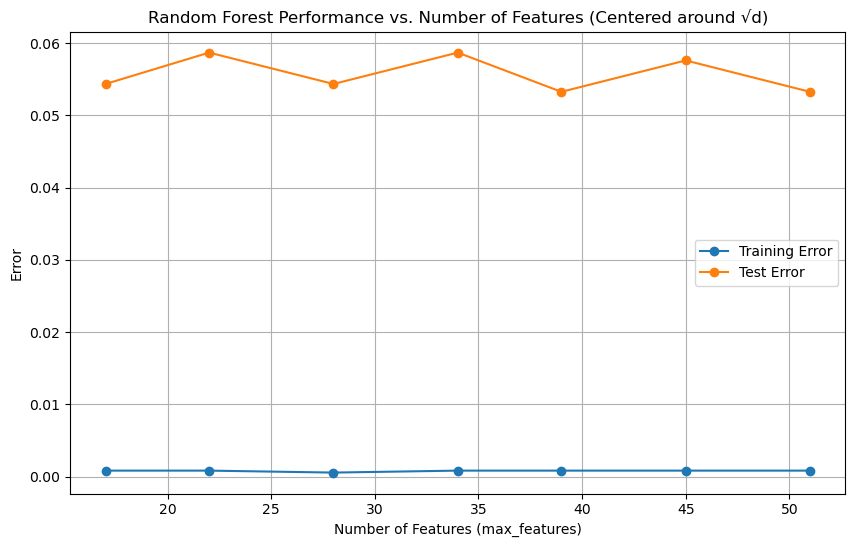

Optimal number of features: 39
Minimum test error: 0.0533


In [ ]:
# Base value for max_features (sqrt(d))
base_max_features = int(np.sqrt(X_train.shape[1]))

# Define number of values (3 below, 1 base, 3 above)
num_values = 7
half_values = num_values // 2  # How many values on each side

# Define a reasonable spread (e.g., 50% of base value)
spread = base_max_features // 2  

# Generate 7 evenly spaced values centered around base_max_features
max_features_range = np.linspace(
    base_max_features - spread,  
    base_max_features + spread,  
    num_values                  
).astype(int)

# To store training and test errors for each max_features value
train_errors = []
test_errors = []

# Loop through different max_features values
for max_features in max_features_range:
    # Train a Random Forest with the current max_features
    rf = RandomForestClassifier(
        n_estimators=100,  # Number of trees
        max_features=max_features,
        bootstrap=True,
        random_state=random
    )
    rf.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Store errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, train_errors, label='Training Error', marker='o')
plt.plot(max_features_range, test_errors, label='Test Error', marker='o')
plt.xlabel('Number of Features (max_features)')
plt.ylabel('Error')
plt.title('Random Forest Performance vs. Number of Features (Centered around √d)')
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of features with the minimum test error
optimal_n_features = max_features_range[np.argmin(test_errors)]
print(f"Optimal number of features: {optimal_n_features}")
print(f"Minimum test error: {min(test_errors):.4f}")


----
- **Define a range of `max_samples` values**:
  - Test fractions of the training data from 10% to 100% in 10 evenly spaced steps.

- **Initialize lists** to store training and test errors for each `max_samples` value.

- **Loop through each `max_samples` value**:
  - Train a Random Forest model with the current `max_samples` (fraction of training data used for bootstrap sampling).
  - Use 100 trees (`n_estimators=100`) and `max_features` set to the square root of the number of features (`sqrt(d)`).
  - Make predictions on the training (`X_train`) and test (`X_test`) datasets.
  - Compute training and test errors using `accuracy_score`.
  - Store the errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing how training and test errors change with the fraction of training data used (`max_samples`).
  - Include labels, a legend, and a grid for better visualization.

- **Identify the optimal fraction of training data**:
  - Find the `max_samples` value that results in the lowest test error.
  - Print the optimal fraction of training data and the corresponding minimum test error.

- **Output results**:
  - Display the plot of errors vs. fraction of training data used.
  - Print the optimal fraction of training data and the minimum test error achieved.

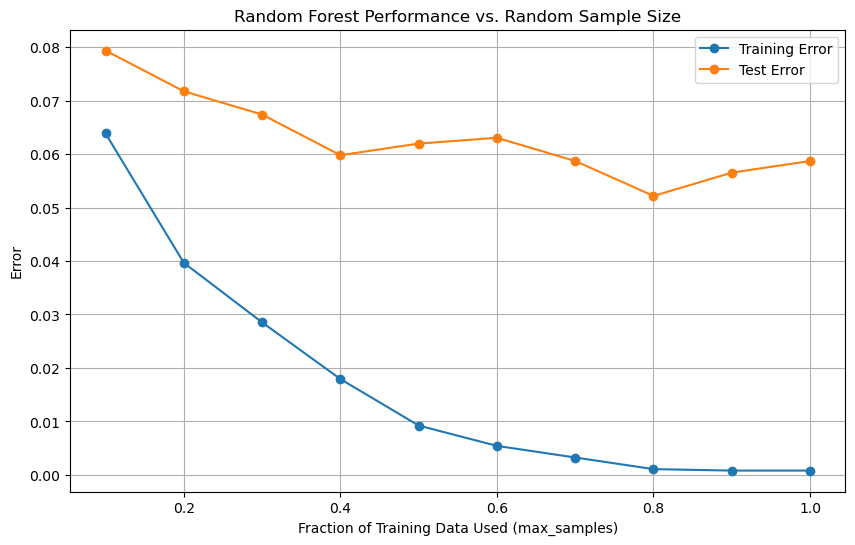

Optimal number of sample: 0.8
Minimum test error: 0.0522


In [ ]:
# Define the range of max_samples as a fraction of the original dataset size
max_samples_range = np.linspace(0.1, 1.0, 10)  # From 10% to 100% of the training data

# To store training and test errors for each max_samples value
train_errors = []
test_errors = []

# Loop through different max_samples values
for max_samples in max_samples_range:
    # Train a Random Forest with the current max_samples
    rf = RandomForestClassifier(
        n_estimators=100,             # Number of trees
        max_features=int(np.sqrt(X_train.shape[1])),  # Default to sqrt(d)
        bootstrap=True,               # Enable bootstrap sampling
        max_samples=max_samples,      # Size of the random sample as a fraction
        random_state=random
    )
    rf.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Store errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_samples_range, train_errors, label='Training Error', marker='o')
plt.plot(max_samples_range, test_errors, label='Test Error', marker='o')
plt.xlabel('Fraction of Training Data Used (max_samples)')
plt.ylabel('Error')
plt.title('Random Forest Performance vs. Random Sample Size')
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of sample with the minimum test error
optimal_p_samples = max_samples_range[np.argmin(test_errors)]
print(f"Optimal number of sample: {optimal_p_samples}")
print(f"Minimum test error: {min(test_errors):.4f}")


----
- **Define proportions of training data** to use:
  - Test proportions of 10%, 20%, 30%, 50%, 70%, and 100% of the full training dataset.

- **Initialize lists** to store training and test errors for each proportion of training data.

- **Loop through each proportion of training data**:
  - Sample the training data (`X_train`, `y_train`) based on the current proportion using `train_test_split` (if proportion < 1.0).
  - Use the full training dataset if the proportion is 1.0.

- **Train a Random Forest model**:
  - Use 100 trees (`n_estimators=100`).
  - Set `max_features` to the square root of the number of features (`sqrt(d)`).
  - Enable bootstrap sampling (`bootstrap=True`).
  - Train the model on the sampled training data.

- **Make predictions**:
  - Predict on the full training (`X_train`) and test (`X_test`) datasets.

- **Compute errors**:
  - Calculate training and test errors using `accuracy_score`.
  - Store the errors in `train_errors` and `test_errors` lists.

- **Plot the results**:
  - Create a line plot showing how training and test errors change with the proportion of training data used.
  - Include labels, a legend, and a grid for better visualization.

- **Identify the optimal proportion of training data**:
  - Find the proportion that results in the lowest test error.
  - Print the optimal proportion and the corresponding minimum test error.

- **Output results**:
  - Display the plot of errors vs. proportion of training data used.
  - Print the optimal proportion of training data and the minimum test error achieved.

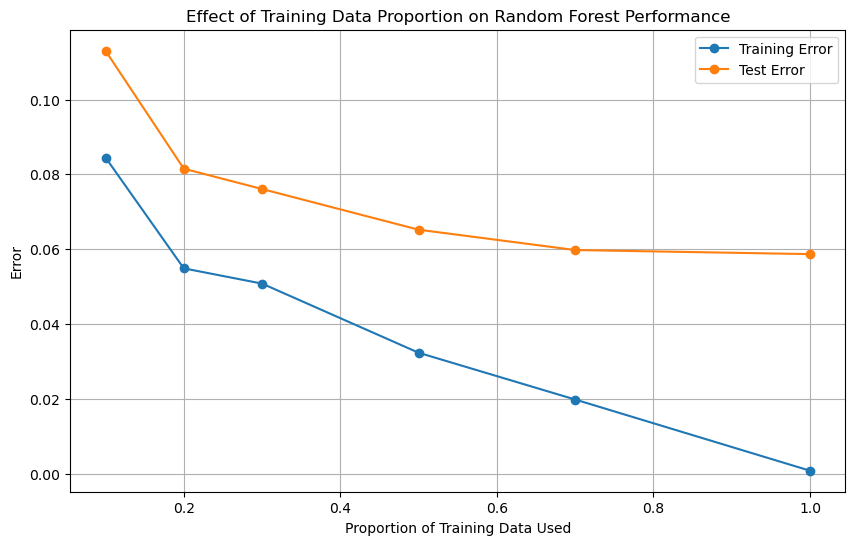

Optimal percentage of training data: 1.0
Minimum test error: 0.0587


In [ ]:
# Define proportions of training data to use
training_data_proportions = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]  # Proportions of training data to use

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop over different proportions of training data
for proportion in training_data_proportions:
    # Sample the training data based on the current proportion
    if proportion < 1.0:
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=proportion, random_state=42)
    else:
        X_train_sample, y_train_sample = X_train, y_train
    
    # Define the Random Forest classifier
    rf = RandomForestClassifier(
        n_estimators=100,                # Fixed number of trees
        max_features=int(np.sqrt(X_train.shape[1])),  # sqrt(d) random features for splits
        bootstrap=True,                  # Bootstrap sampling
        random_state=random                  # For reproducibility
    )
    
    # Train the Random Forest on the sampled training data
    rf.fit(X_train_sample, y_train_sample)
    
    # Predict on the full training and test datasets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Compute errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_data_proportions, train_errors, label="Training Error", marker='o')
plt.plot(training_data_proportions, test_errors, label="Test Error", marker='o')
plt.xlabel("Proportion of Training Data Used")
plt.ylabel("Error")
plt.title("Effect of Training Data Proportion on Random Forest Performance")
plt.legend()
plt.grid(True)
plt.show()

# Identify the number of sample with the minimum test error
optimal_p_train = training_data_proportions[np.argmin(test_errors)]
print(f"Optimal percentage of training data: {optimal_p_train}")
print(f"Minimum test error: {min(test_errors):.4f}")